***Foodborne Disease Outbreaks***

In [ ]:
import pandas as pd
import numpy as np

#read csv
df = pd.read_csv('/content/outbreaks.csv')
df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [ ]:
# description about location column

df['Location'].describe()

,Location
count,16953
unique,161
top,Restaurant
freq,10448


In [ ]:
# replace null values in df['Location']
#  with the mode of data

mode_location = df['Location'].mode()[0]
df['Location'].fillna(mode_location, inplace=True)

<ipython-input-22-898efd6d8ad4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(mode_location, inplace=True)


In [ ]:
df['Location'].isnull().sum()

0

In [ ]:
#  remove rows with null values for Food and Status column

df = df[df['Food'].notna()]
df = df[df['Status'].notna()]

In [ ]:
# drop column ingredient as it as mostly null values

# Check for null values in the 'Ingredient' column
print(df['Ingredient'].isnull().sum())

# Drop the 'Ingredient' column
df = df.drop('Ingredient', axis=1)

5611


In [ ]:
# drop column Serotype/Genotype as it as mostly null values

# Check for null values in the 'Serotype/Genotype' column
print(df['Serotype/Genotype'].isnull().sum())

# Drop the 'Serotype/Genotype' column
df = df.drop('Serotype/Genotype', axis=1)

5178


In [ ]:
df.head()

,Year,Month,State,Location,Food,Species,Status,Illnesses,Hospitalizations,Fatalities
3,1998,January,California,Restaurant,"Fish, Ahi",Scombroid toxin,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Salmonella enterica,Confirmed,26,3.0,0.0
7,1998,January,California,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",Salmonella enterica,Confirmed,4,3.0,0.0
8,1998,January,Colorado,Restaurant,"Salad, Unspecified",Virus,Suspected,21,NaN,NaN
9,1998,January,Colorado,Restaurant,"Peppers, Chili",Virus,Suspected,3,NaN,0.0


In [ ]:
#  replace null values of hospitalization with mean value of the column

# Calculate the mean of the 'Hospitalization' column, ignoring NaN values
mean_hospitalization = df['Hospitalizations'].mean()

# Replace NaN values in the 'Hospitalization' column with the calculated mean
df['Hospitalizations'].fillna(mean_hospitalization, inplace=True)

# Verify the null value counts after replacement
print(df['Hospitalizations'].isnull().sum())

0


<ipython-input-28-7711876db45e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hospitalizations'].fillna(mean_hospitalization, inplace=True)


In [ ]:
# replace null values of Fatalities with mean value of the column

# Calculate the mean of the 'Fatalities' column, ignoring NaN values
mean_Fatalities = df['Fatalities'].mean()

# Replace NaN values in the 'Fatalities' column with the calculated mean
df['Fatalities'].fillna(mean_Fatalities, inplace=True)

# Verify the null value counts after replacement
print(df['Fatalities'].isnull().sum())

0


<ipython-input-29-1cdb66f2cbbd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fatalities'].fillna(mean_Fatalities, inplace=True)


In [ ]:
df.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,7245.000000,7245.000000,7245.000000,7245.000000
mean,2005.408558,25.144928,1.673527,0.040803
std,5.005197,63.496870,7.383934,0.537398
min,1998.000000,2.000000,0.000000,0.000000
25%,2001.000000,4.000000,0.000000,0.000000
50%,2005.000000,10.000000,0.000000,0.000000
75%,2009.000000,25.000000,1.673527,0.000000
max,2015.000000,1939.000000,308.000000,33.000000




---



# **Q1) Are foodborne disease outbreaks increasing or decreasing?**

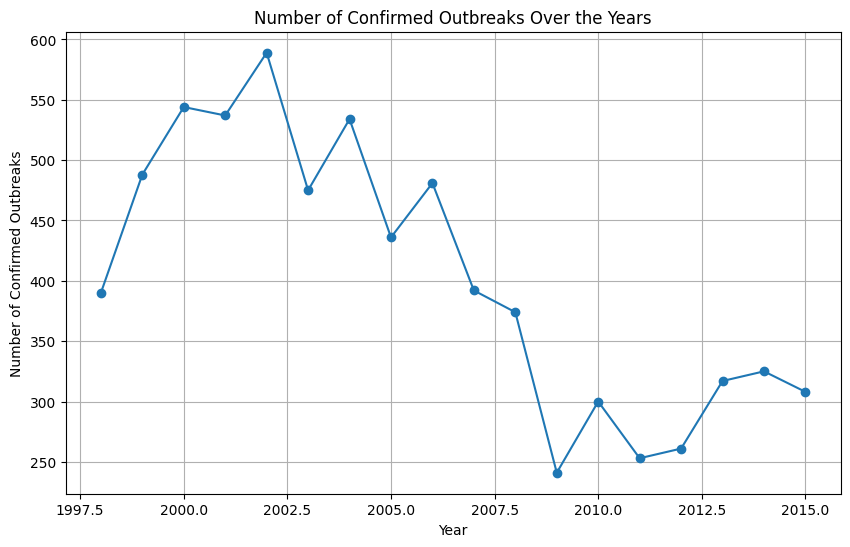

In [ ]:
# a plot to visualize the number of confirmed status over the years

import matplotlib.pyplot as plt

confirmed_counts = df[df['Illnesses'] >=1].groupby('Year').size()

plt.figure(figsize=(10, 6))
plt.plot(confirmed_counts.index, confirmed_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Confirmed Outbreaks')
plt.title('Number of Confirmed Outbreaks Over the Years')
plt.grid(True)
plt.show()

 **Through the above plot we can see that the outbreaks over the years have been decreasing.
It started increasing from 1997 to 2002, and later on it has been decreasing**




---



# **Q2) Which contaminant has been responsible for the most illnesses,hospitalizations, and deaths?**

In [ ]:
#count of the number of Illnesses, hospitalizations , fatalities  for each Species

# Group by 'Species' and sum 'Illnesses', 'Hospitalizations', and 'Fatalities'
species_summary = df.groupby('Species').agg({'Illnesses': 'sum', 'Hospitalizations': 'sum', 'Fatalities': 'sum'})

species_summary

,Illnesses,Hospitalizations,Fatalities
Species,,,
Amnesic shellfish poison,2,2.000000,0.000000
Anisakis,14,0.000000,0.000000
Bacillus cereus,2402,130.452780,2.529766
Bacillus cereus; Bacillus other,5,0.000000,0.000000
Bacillus cereus; Clostridium perfringens,1439,29.408797,1.408027
...,...,...,...
Vibrio parahaemolyticus; Vibrio other,17,3.000000,0.000000
Vibrio unknown,12,5.347054,0.081605
Vibrio vulnificus,2,1.000000,1.000000


In [ ]:
# which species has highest count of illnesses, hospitalizations and fatalities. Also visualize top 5 species

# Sort the species summary by illnesses, hospitalizations, and fatalities in descending order
species_summary_sorted_illnesses = species_summary.sort_values(by='Illnesses', ascending=False)
species_summary_sorted_hospitalizations = species_summary.sort_values(by='Hospitalizations', ascending=False)
species_summary_sorted_fatalities = species_summary.sort_values(by='Fatalities', ascending=False)

# Get the species with the highest counts for each metric
highest_illnesses_species = species_summary_sorted_illnesses.index[0]
highest_hospitalizations_species = species_summary_sorted_hospitalizations.index[0]
highest_fatalities_species = species_summary_sorted_fatalities.index[0]

print(f"Species with the highest number of illnesses: {highest_illnesses_species}")
print(f"Species with the highest number of hospitalizations: {highest_hospitalizations_species}")
print(f"Species with the highest number of fatalities: {highest_fatalities_species}")


Species with the highest number of illnesses: Salmonella enterica
Species with the highest number of hospitalizations: Salmonella enterica
Species with the highest number of fatalities: Listeria monocytogenes


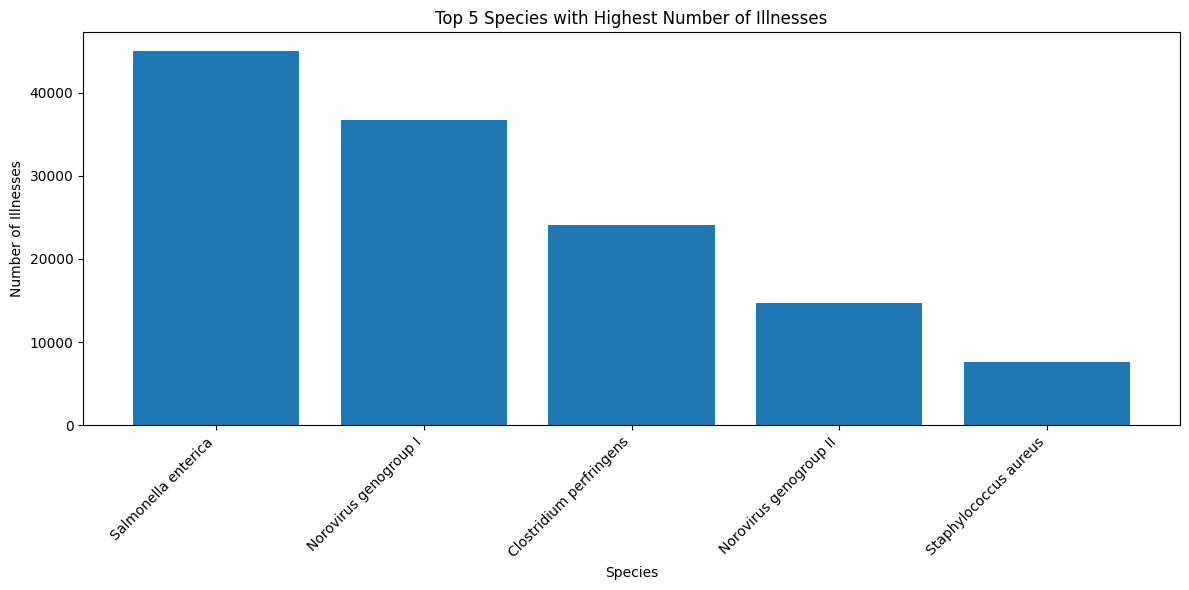

In [ ]:


# Visualize the top 5 species
top_5_species_illnesses = species_summary_sorted_illnesses.head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_5_species_illnesses.index, top_5_species_illnesses['Illnesses'])
plt.xlabel("Species")
plt.ylabel("Number of Illnesses")
plt.title("Top 5 Species with Highest Number of Illnesses")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Answer: Salmonella enterica is the cause for highest number of Illnesses**



---



# **Q3) What location for food preparation poses the greatest risk of foodborne illness?**

In [ ]:
#sum of Illnesses group by location

# Group by 'Location' and sum 'Illnesses'
location_illnesses = df.groupby('Location')['Illnesses'].sum()

# Sort the result in descending order
location_illnesses_sorted = location_illnesses.sort_values(ascending=False)

# Print the result
location_illnesses_sorted

,Illnesses
Location,
Restaurant,87902
Catering Service,20120
Private Home/Residence,15591
Prison/Jail,12989
School/College/University,6793
...,...
Catering Service; School/College/University,7
Private Home/Residence; Child Daycare,6
Restaurant; Unknown,5


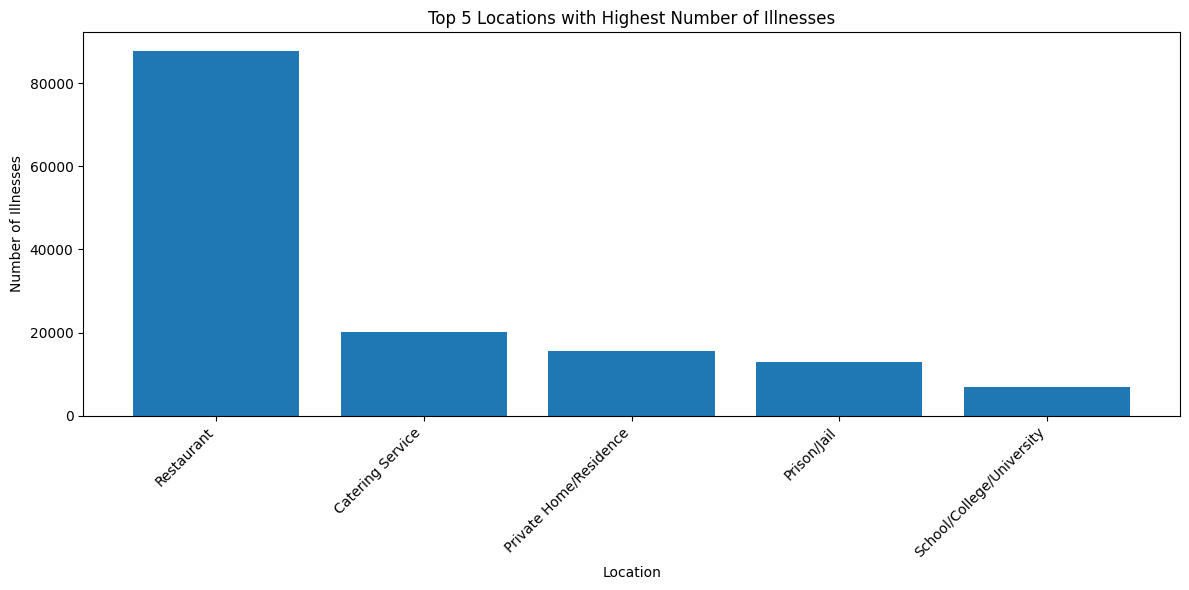

In [ ]:
#visualize top 5 in location_illnesses_sorted

top_5_locations = location_illnesses_sorted.head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_5_locations.index, top_5_locations.values)
plt.xlabel("Location")
plt.ylabel("Number of Illnesses")
plt.title("Top 5 Locations with Highest Number of Illnesses")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Answer: Restaurant is the place causing highest number of illnesses**



---

